In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from tabulate import tabulate
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#IMPORT THE DATASET

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/ajkam/schulich_data_science/main/conversion_data.csv')
df.head()


,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


PRINT THE FIRST 5 ROWS

#DATA CLEANING AND CHECKING

look for missing data and incorrect data type with df.info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [29]:
df[['visitor_location', 'marketing_channel', 'gender']] = df[['visitor_location', 'marketing_channel', 'gender']].astype('category')

Casted all the categorical variables from object to category 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   visitor_id         2000 non-null   int64   
 1   visitor_location   2000 non-null   category
 2   marketing_channel  2000 non-null   category
 3   gender             2000 non-null   category
 4   product_views_Mon  2000 non-null   int64   
 5   product_views_Tue  2000 non-null   int64   
 6   product_views_Wed  2000 non-null   int64   
 7   product_views_Thu  2000 non-null   int64   
 8   product_views_Fri  2000 non-null   int64   
 9   avg_rating_Mon     2000 non-null   float64 
 10  avg_rating_Tue     2000 non-null   float64 
 11  avg_rating_Wed     2000 non-null   float64 
 12  avg_rating_Thu     2000 non-null   float64 
 13  avg_rating_Fri     2000 non-null   float64 
 14  avg_price_Mon      2000 non-null   float64 
 15  avg_price_Tue      2000 non-null   float64 
 16  avg_pr

In [ ]:
df.isna().sum()

Unnamed: 0           0
visitor_id           0
visitor_location     0
marketing_channel    0
gender               0
product_views_Mon    0
product_views_Tue    0
product_views_Wed    0
product_views_Thu    0
product_views_Fri    0
avg_rating_Mon       0
avg_rating_Tue       0
avg_rating_Wed       0
avg_rating_Thu       0
avg_rating_Fri       0
avg_price_Mon        0
avg_price_Tue        0
avg_price_Wed        0
avg_price_Thu        0
avg_price_Fri        0
time_on_site_Mon     0
time_on_site_Tue     0
time_on_site_Wed     0
time_on_site_Thu     0
time_on_site_Fri     0
pages_visited_Mon    0
pages_visited_Tue    0
pages_visited_Wed    0
pages_visited_Thu    0
pages_visited_Fri    0
converted_Fri        0
dtype: int64

Check if there are any missing values

In [ ]:
missing_proportion = df.isna().sum() / len(df)
print(missing_proportion)

Unnamed: 0           0.0
visitor_id           0.0
visitor_location     0.0
marketing_channel    0.0
gender               0.0
product_views_Mon    0.0
product_views_Tue    0.0
product_views_Wed    0.0
product_views_Thu    0.0
product_views_Fri    0.0
avg_rating_Mon       0.0
avg_rating_Tue       0.0
avg_rating_Wed       0.0
avg_rating_Thu       0.0
avg_rating_Fri       0.0
avg_price_Mon        0.0
avg_price_Tue        0.0
avg_price_Wed        0.0
avg_price_Thu        0.0
avg_price_Fri        0.0
time_on_site_Mon     0.0
time_on_site_Tue     0.0
time_on_site_Wed     0.0
time_on_site_Thu     0.0
time_on_site_Fri     0.0
pages_visited_Mon    0.0
pages_visited_Tue    0.0
pages_visited_Wed    0.0
pages_visited_Thu    0.0
pages_visited_Fri    0.0
converted_Fri        0.0
dtype: float64


Check again this timee with proportion

In [ ]:
df.drop(columns=df.columns[0], axis=1,  inplace=True)

Drop the first unamed column as it serves no purpose

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

In [ ]:
df.drop_duplicates(inplace=True)

drop duplicates if any

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

See if records changed so since no change no dupes

Use d.describe() do the ranges make sense?are there outliers?which variables are categorical ,which variables are continuous


In [32]:
df.describe()


,visitor_id,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,avg_rating_Wed,avg_rating_Thu,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2.541500,2.440500,2.441000,2.256500,2.354000,3.023990,3.042760,2.970885,3.026555,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,1.704914,1.715206,2.343345,2.370974,2.335682,1.151037,1.154019,1.148805,1.139744,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,1.000000,0.000000,0.000000,0.000000,-4.000000,-3.000000,1.000000,1.000000,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,500.750000,1.000000,1.000000,0.000000,0.000000,0.000000,2.017500,2.057500,1.970000,2.030000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,1000.500000,3.000000,2.000000,2.000000,2.000000,2.000000,3.055000,3.080000,2.965000,3.060000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1500.250000,4.000000,4.000000,4.000000,5.000000,5.000000,4.022500,4.030000,3.960000,4.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000
max,2000.000000,5.000000,5.000000,9.000000,8.000000,8.000000,5.000000,5.000000,4.990000,5.000000,...,60.000000,60.000000,60.000000,60.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000


As from previous we know that gender, location and marketing channel are categorical while the rest are continous

In [34]:
# Calculate the difference between min and max for each numerical column
difference_dict = {}

In [35]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    difference = df[col].max() - df[col].min()
    difference_dict[col] = difference

# Print the calculated differences
for col, diff in difference_dict.items():
    print(f"RANGE for {col}: {diff}")

RANGE for visitor_id: 1999
RANGE for product_views_Mon: 5
RANGE for product_views_Tue: 5
RANGE for product_views_Wed: 9
RANGE for product_views_Thu: 12
RANGE for product_views_Fri: 11
RANGE for avg_rating_Mon: 4.0
RANGE for avg_rating_Tue: 4.0
RANGE for avg_rating_Wed: 3.99
RANGE for avg_rating_Thu: 4.0
RANGE for avg_rating_Fri: 4.0
RANGE for avg_price_Mon: 79.84
RANGE for avg_price_Tue: 79.95
RANGE for avg_price_Wed: 79.98
RANGE for avg_price_Thu: 79.83
RANGE for avg_price_Fri: 79.94999999999999
RANGE for time_on_site_Mon: 40
RANGE for time_on_site_Tue: 40
RANGE for time_on_site_Wed: 40
RANGE for time_on_site_Thu: 40
RANGE for time_on_site_Fri: 40
RANGE for pages_visited_Mon: 6
RANGE for pages_visited_Tue: 6
RANGE for pages_visited_Wed: 6
RANGE for pages_visited_Thu: 6
RANGE for pages_visited_Fri: 6
RANGE for converted_Fri: 1


Some notes on the ranges as time on site are all the same and pages visited
However number of products viewed changed from Monday & Tuesday to increase significnatly for the rest of the week
Also the average rating range changed on Wednesday to be 3.99 compared to 4.0 on the rest of the days as the max rating was 4.99 on Wed compared to 5.0 on the rest of the days

In [ ]:
print(df['product_views_Mon'].unique())

[4 2 3 1 0 5]


In [36]:
print(df['product_views_Wed'].unique())

[2 0 1 6 4 5 3 7 8 9]


In [38]:
print(df['avg_rating_Mon'].unique())

[3.9  1.31 3.26 2.66 2.76 2.8  3.32 3.25 2.12 2.1  4.54 3.3  3.27 1.25
 2.02 3.84 1.11 2.33 2.15 4.87 4.15 3.6  1.03 2.94 2.53 4.67 1.28 4.93
 4.42 2.84 1.42 3.91 2.92 1.81 2.13 3.58 1.33 3.76 4.9  3.29 2.43 3.1
 1.24 2.5  1.77 1.46 3.33 3.83 1.69 4.21 3.88 4.5  3.05 1.59 4.29 3.23
 3.13 2.19 2.3  2.01 2.28 1.23 4.77 3.15 2.87 2.96 2.35 3.14 1.1  4.05
 1.88 2.47 4.52 4.06 1.54 4.28 3.59 4.12 2.95 4.33 3.61 3.16 4.26 1.97
 1.96 3.94 4.64 1.4  3.45 3.95 4.41 2.81 3.43 4.78 1.18 4.74 2.29 4.85
 2.37 3.19 2.75 4.36 1.53 3.47 2.27 3.69 2.67 4.32 1.39 2.22 3.39 3.72
 3.37 4.39 4.53 3.7  2.65 2.82 1.15 1.16 1.   3.18 1.06 4.11 3.66 1.19
 3.97 1.34 3.79 2.46 2.26 4.16 2.14 4.17 2.32 1.84 1.29 2.05 3.78 3.28
 1.65 3.09 2.36 3.02 3.21 1.76 2.64 2.39 3.81 5.   3.77 4.57 2.42 4.
 3.24 2.54 4.35 1.02 1.35 4.27 2.48 4.65 3.68 2.25 2.31 2.83 4.8  3.64
 3.35 2.44 1.71 3.82 3.   2.78 1.5  1.45 3.96 4.51 3.48 4.01 1.78 2.69
 1.22 4.72 2.56 3.5  2.68 4.04 4.66 1.21 1.79 4.24 4.83 4.56 1.7  1.98
 3.03 4.9

In [39]:
print(df['avg_rating_Wed'].unique())

[4.87 1.98 3.12 3.41 3.32 2.28 4.61 4.03 4.31 2.15 4.05 1.49 2.52 1.6
 4.4  4.9  3.61 2.03 2.95 4.53 1.2  1.08 3.1  2.56 4.63 1.44 1.64 3.02
 3.33 1.17 4.65 3.98 2.29 3.25 4.59 4.   3.5  2.81 3.79 4.62 2.61 3.
 1.39 3.59 1.62 4.71 4.88 2.82 4.97 4.02 1.18 4.69 3.38 1.06 4.73 4.07
 3.45 4.1  1.48 3.4  4.12 1.72 3.35 1.33 4.17 2.13 2.66 1.1  3.53 4.77
 1.84 4.45 4.15 4.75 2.02 4.34 4.89 4.39 3.09 3.24 4.47 4.42 3.7  2.69
 2.63 4.99 2.18 2.72 1.56 2.25 3.73 2.09 3.76 3.88 4.16 1.75 4.52 4.19
 3.86 1.63 1.68 4.81 1.19 4.84 4.43 3.58 3.68 4.54 4.09 2.33 4.85 2.77
 3.03 3.82 4.35 2.07 3.3  1.43 3.65 1.5  1.76 1.09 1.58 3.8  2.04 3.51
 4.57 4.25 2.7  3.99 4.24 4.83 3.11 2.48 2.89 4.11 1.47 2.26 3.81 2.42
 4.01 2.05 2.46 1.51 3.93 2.97 3.74 3.72 1.01 2.93 4.96 4.79 4.95 3.67
 1.34 2.78 2.44 4.06 2.41 3.97 3.01 3.64 2.87 4.64 1.82 1.87 1.4  1.21
 2.21 1.94 1.85 3.21 1.7  4.21 1.31 2.67 1.12 4.58 2.79 3.91 2.5  1.77
 4.67 4.23 2.55 2.8  3.13 1.95 2.   1.53 1.92 1.42 3.63 1.25 4.66 2.65
 3.95 3.1

In [ ]:
print(df['converted_Fri'].unique())

[1 0]


In [ ]:
print(df['time_on_site_Mon'].unique())

[57 24 23 56 35 49 20 45 26 55 22 28 51 29 25 40 43 41 33 31 32 37 50 27
 58 39 21 38 44 30 54 42 48 47 52 46 53 36 60 34 59]


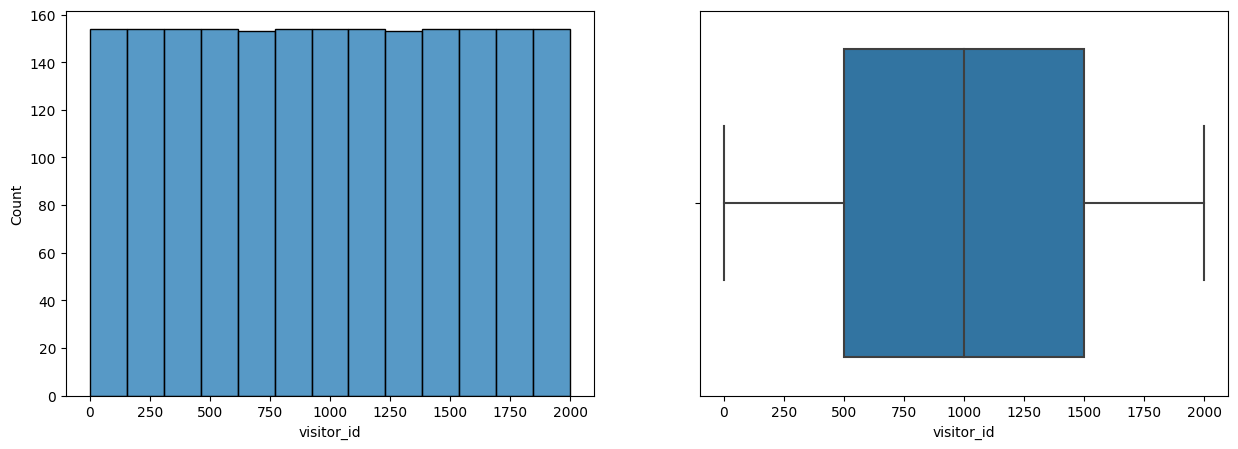

0.0
-1.2000006000001502


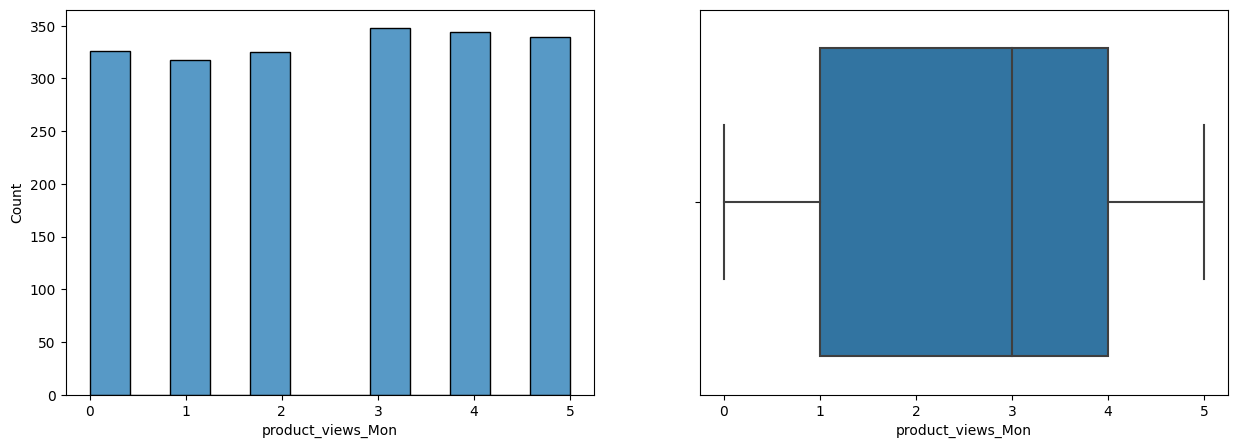

-0.04339723992227179
-1.2595334694359583


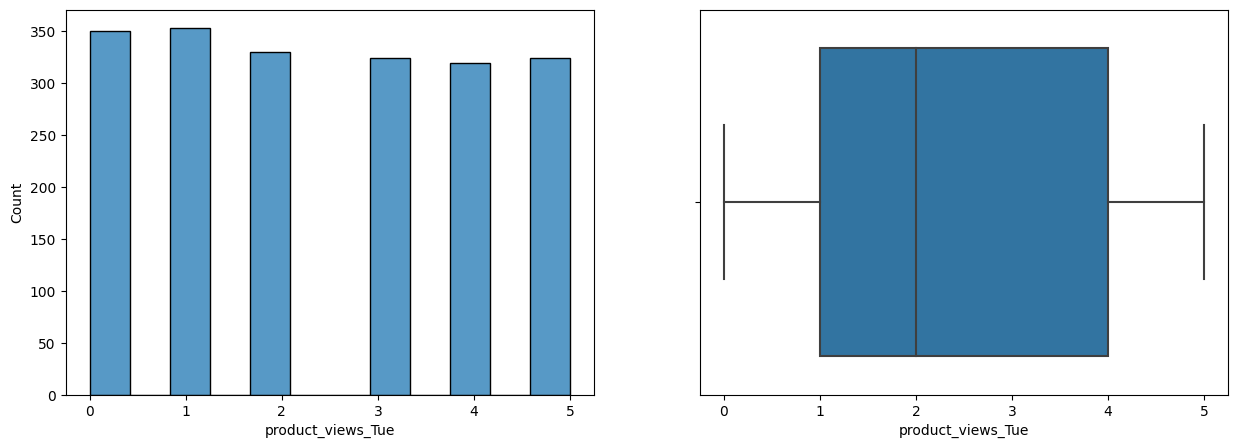

0.05239895534857225
-1.278349926686584


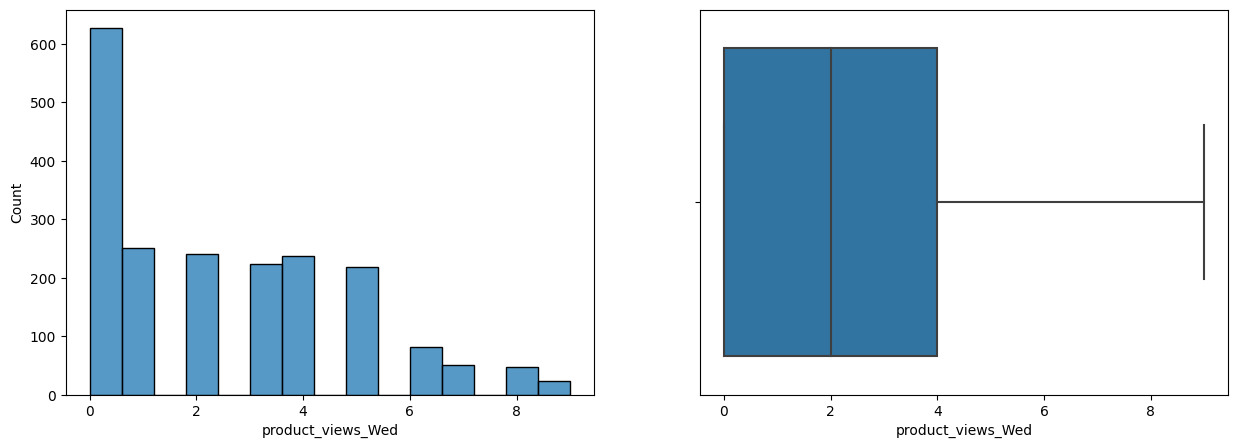

0.7078649532941341
-0.35422487943281133


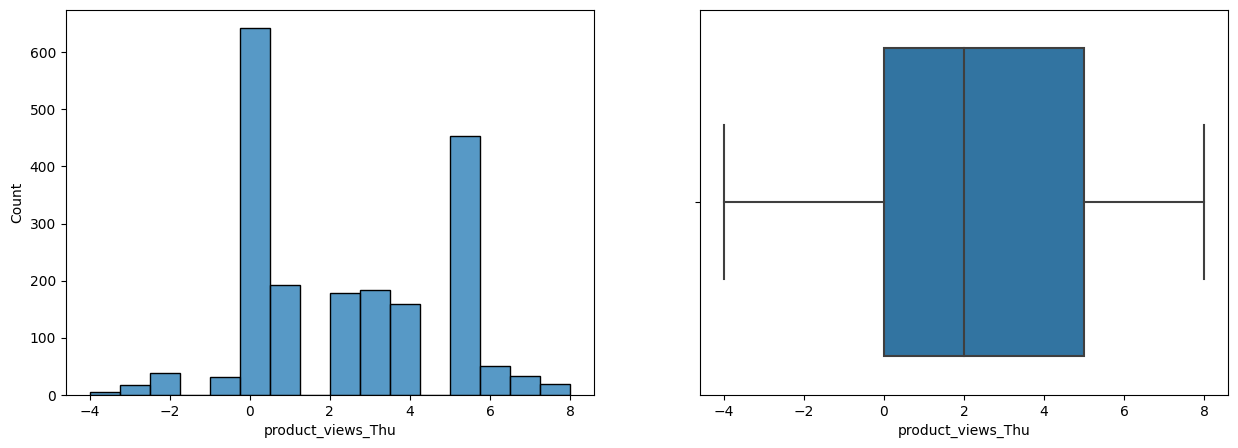

0.18508333245295
-1.019154529926297


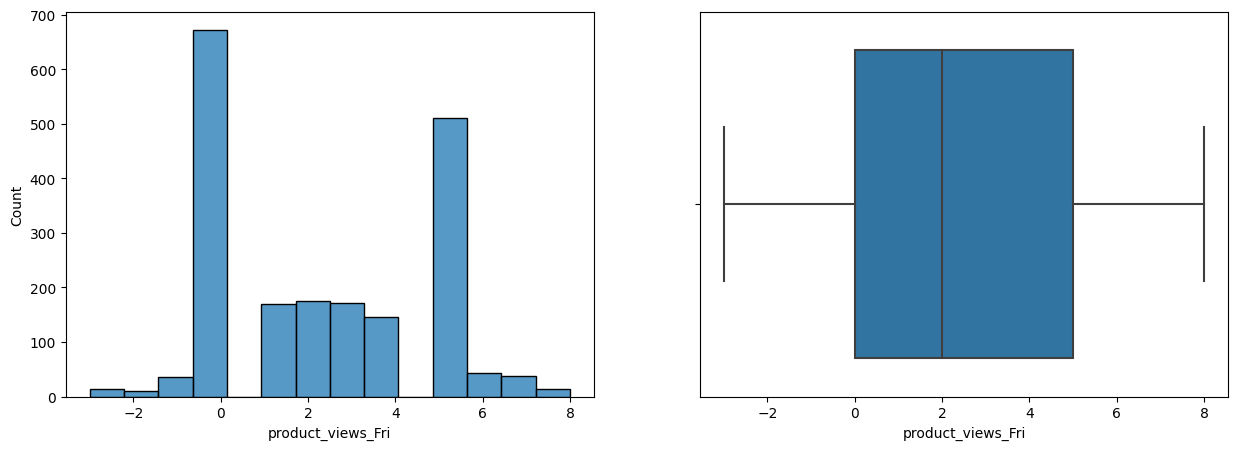

0.19578852072874067
-1.230292770208432


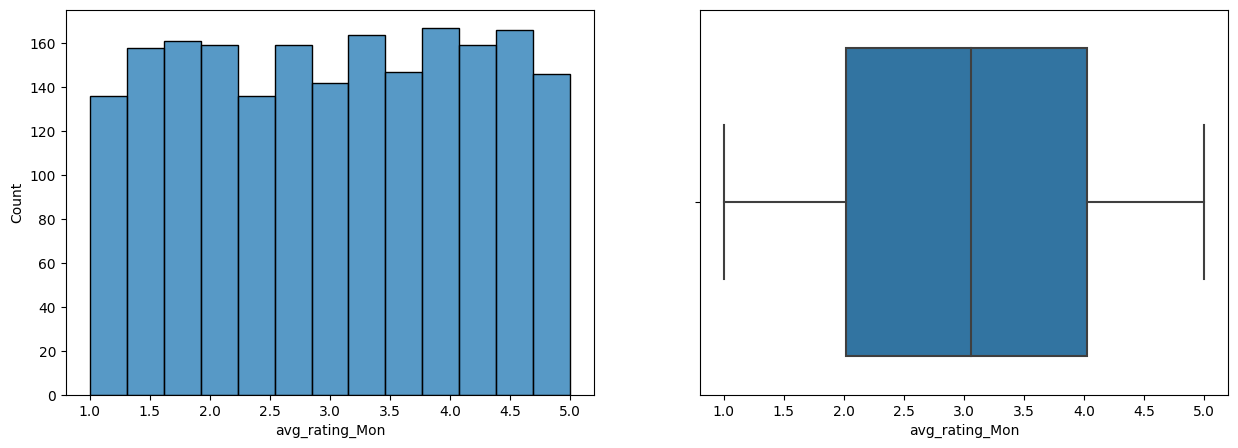

-0.036569401570234646
-1.2192260019428236


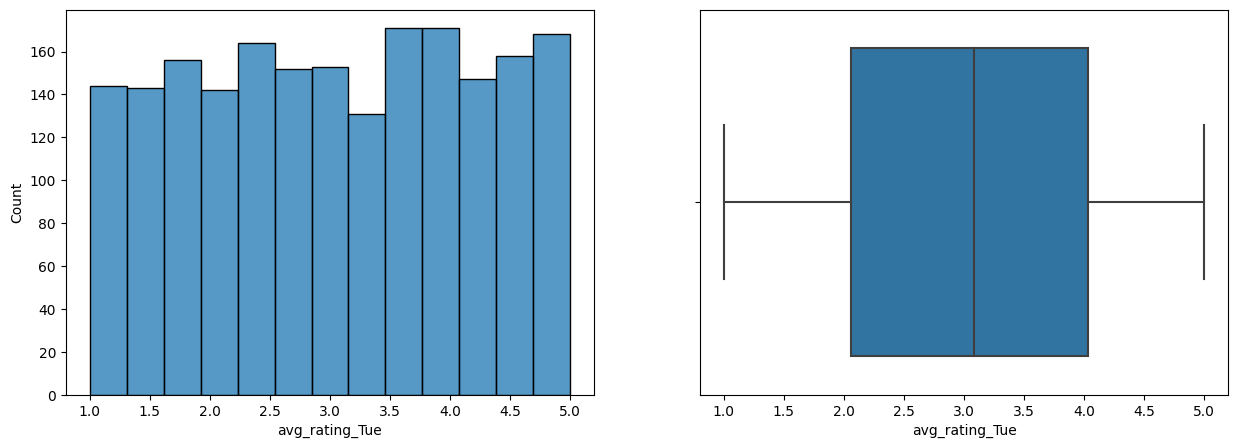

-0.04306188757167769
-1.192970789047595


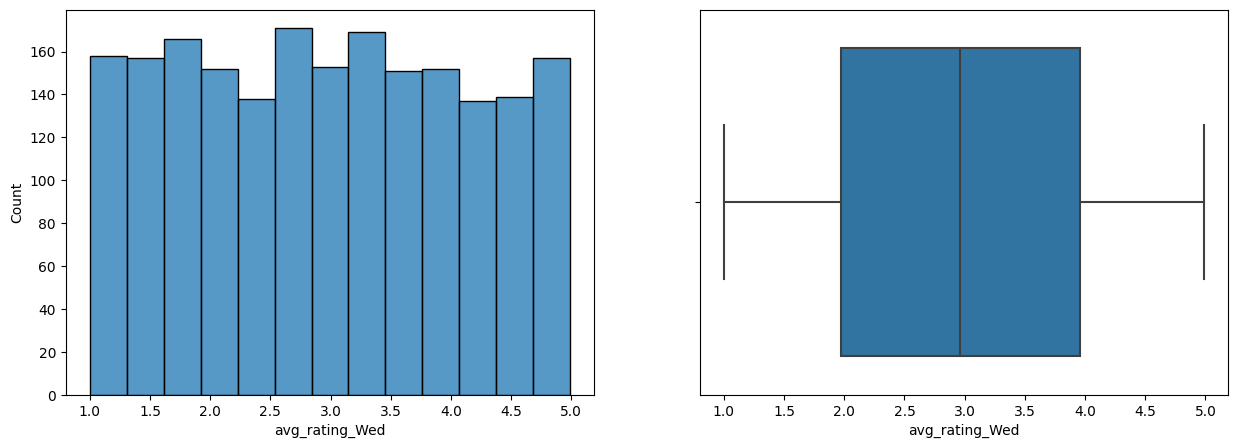

0.04108520953174745
-1.175952222375065


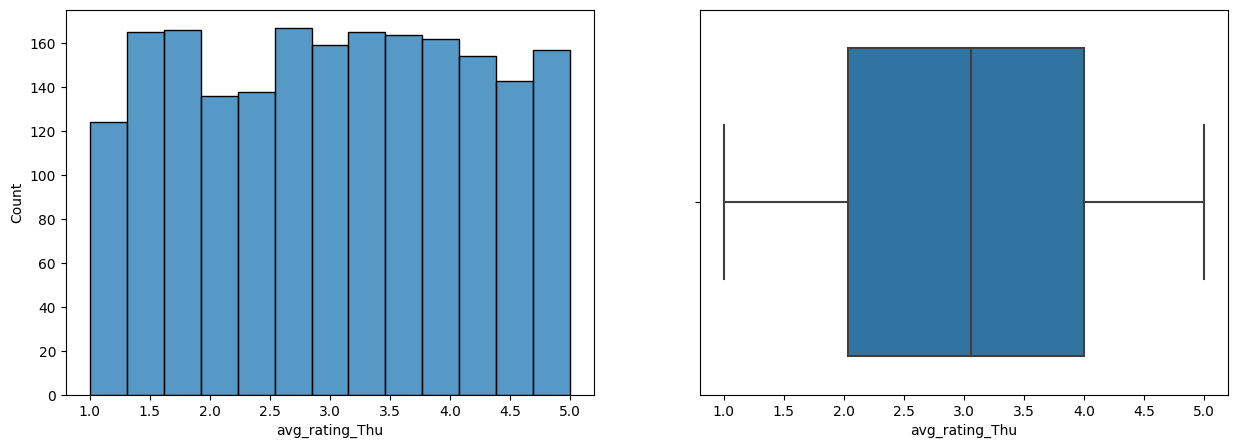

-0.021059652207191585
-1.1665255431135517


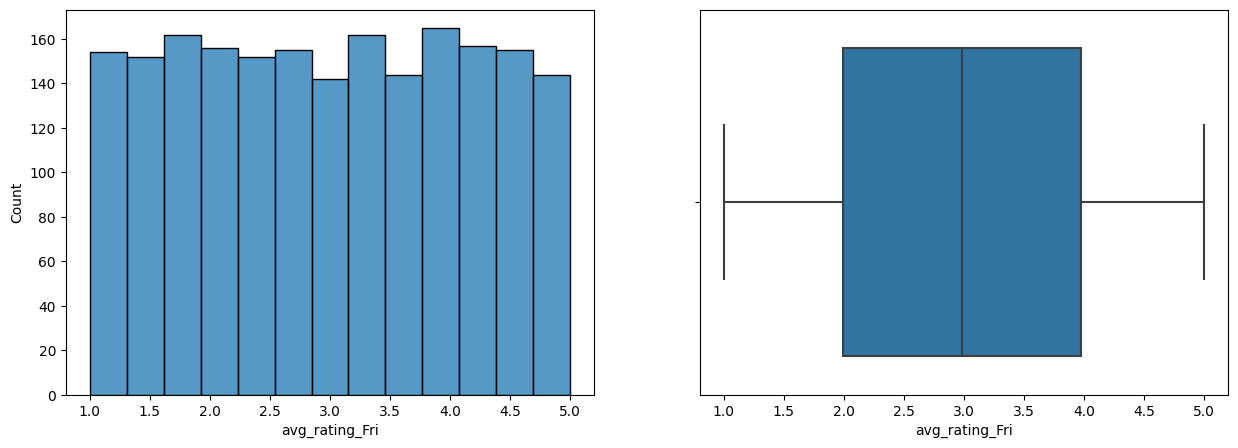

0.0011903008781474437
-1.2093578638463074


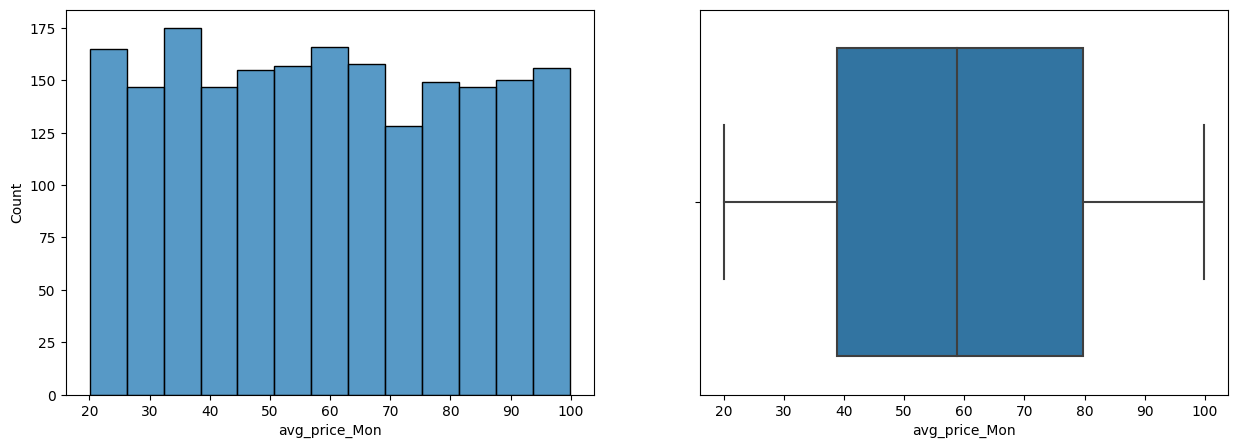

0.04475490871743474
-1.2066916544930508


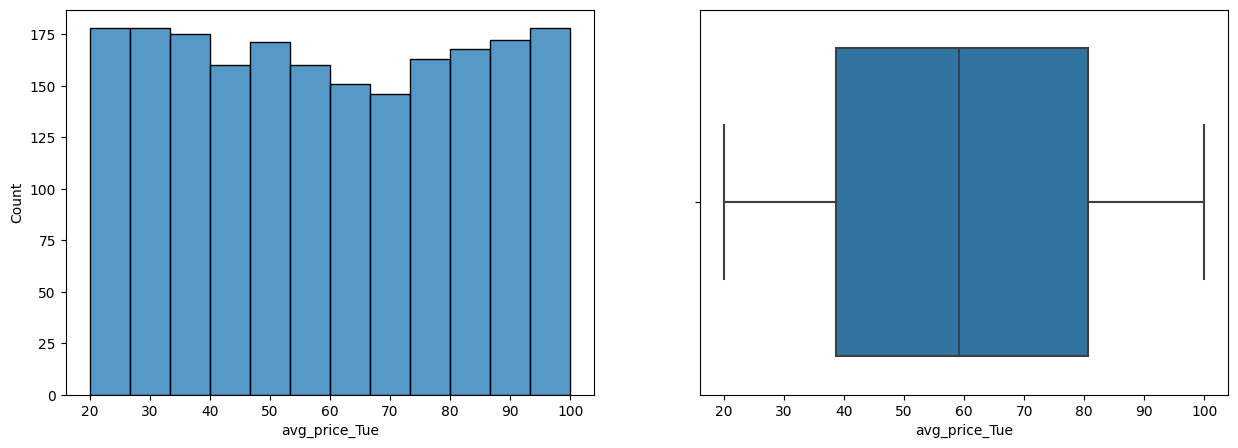

0.02480764664794289
-1.2566830578426142


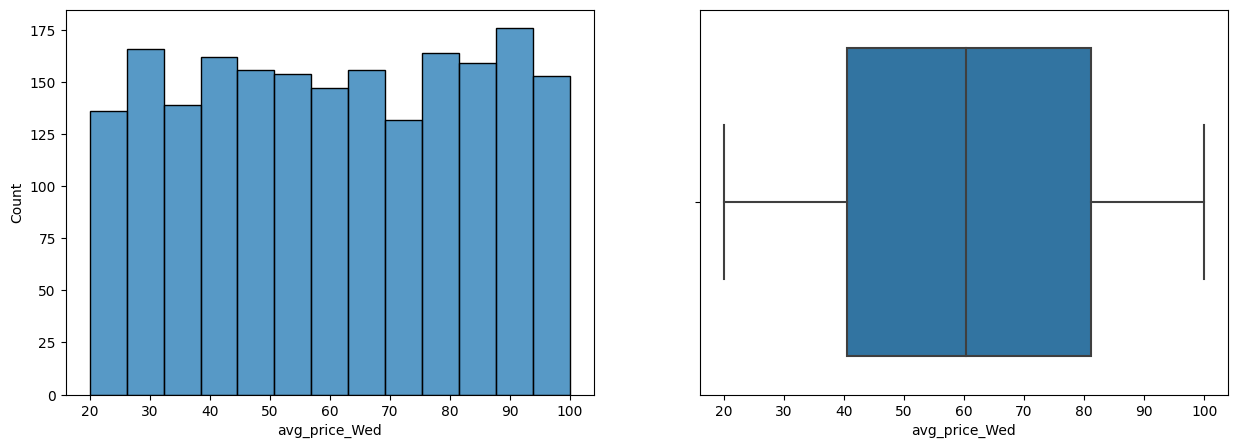

-0.011190086926561342
-1.2246138048981183


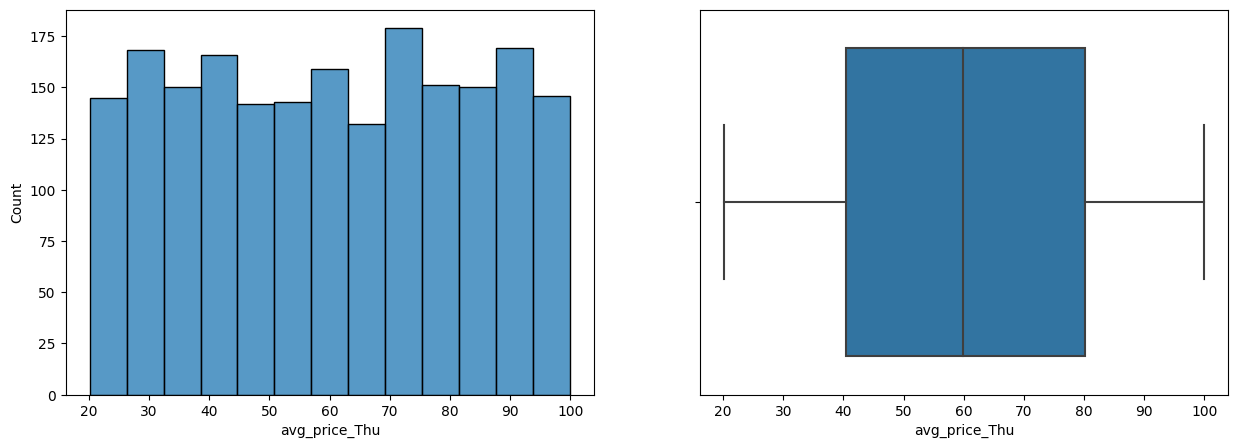

-0.0024596812160298524
-1.2119026843095375


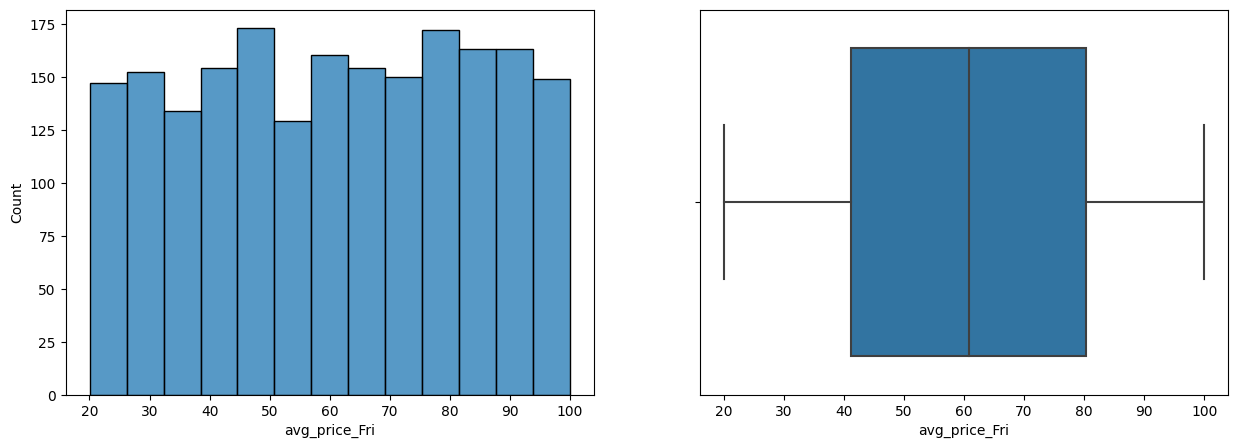

-0.05371918441986527
-1.198569783783552


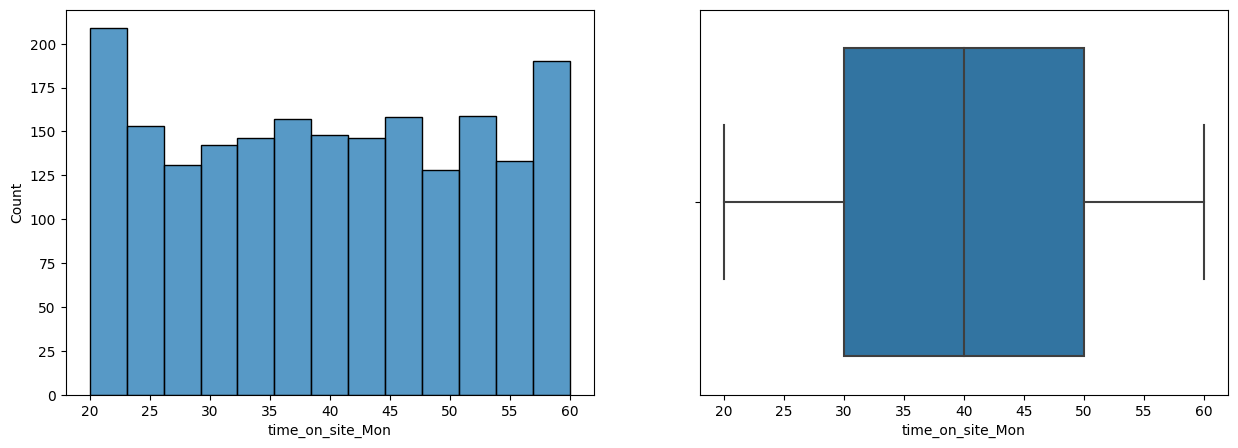

0.00775495824309856
-1.1834401349813246


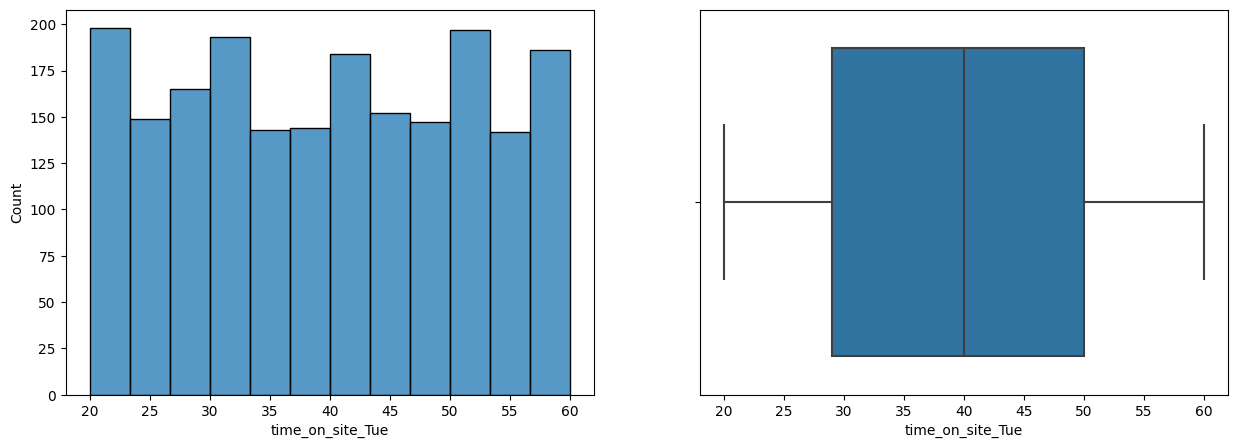

0.026756044875422436
-1.207058766468054


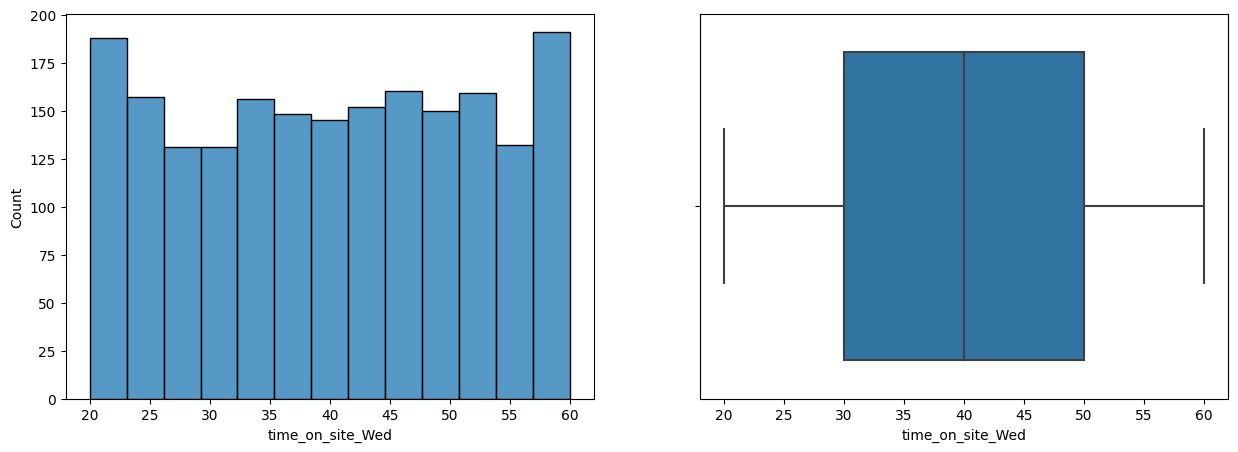

-0.015447072259302247
-1.1803177181842908


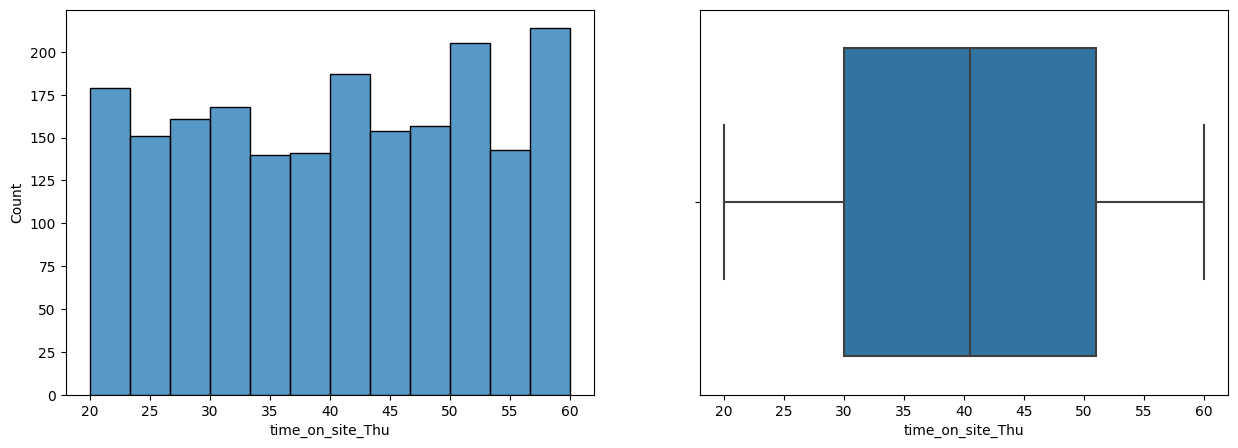

-0.03831454993741832
-1.2159987351900767


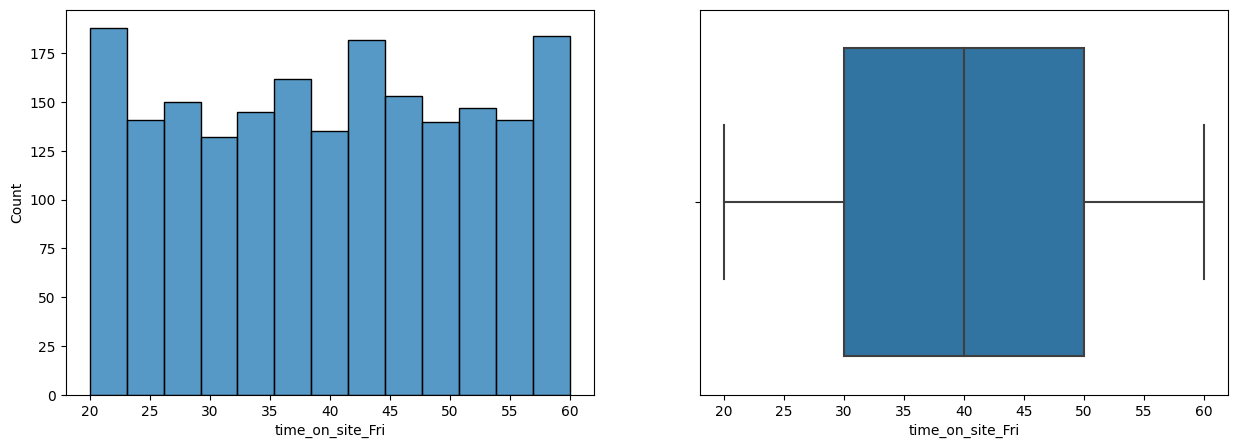

-0.017671746155822867
-1.1569427471748976


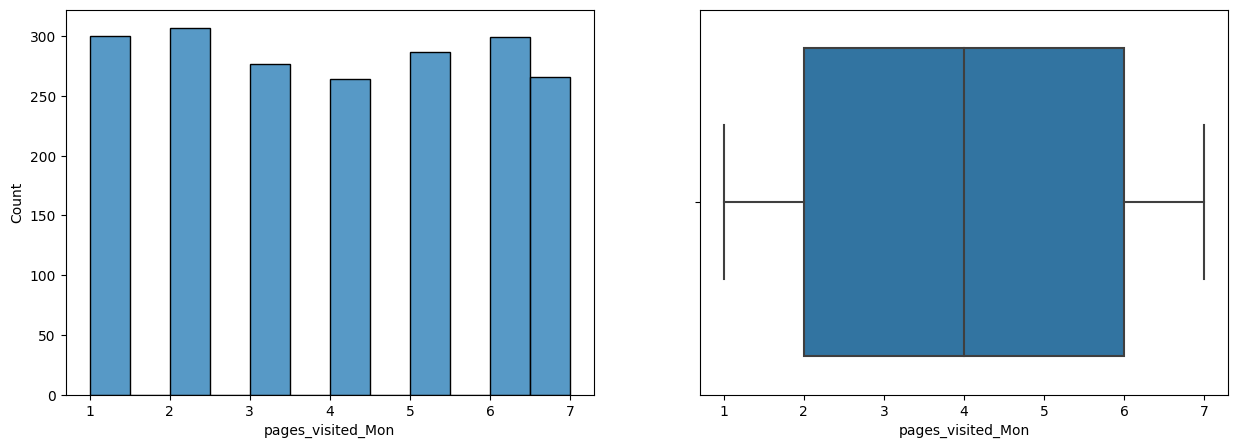

0.020743925582318426
-1.28170676296405


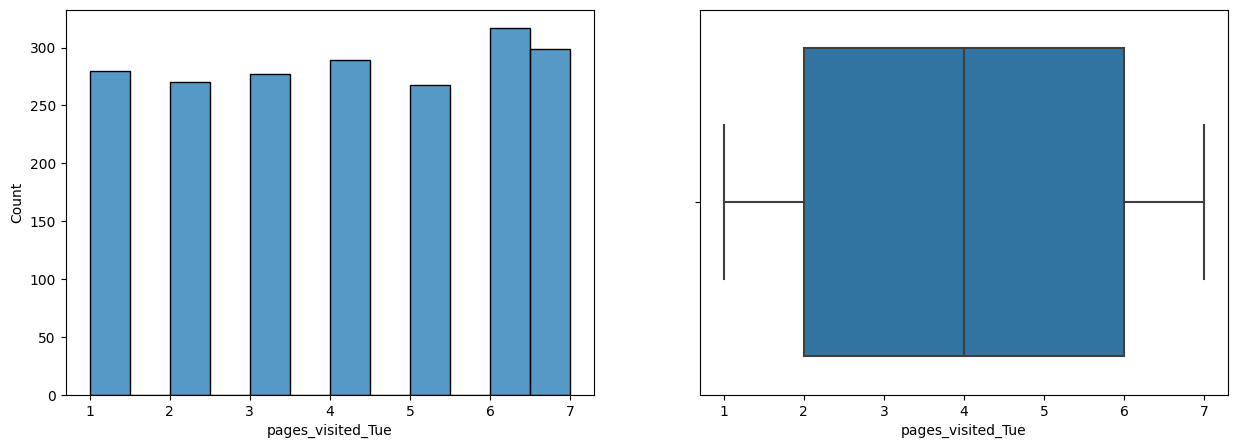

-0.05187878034716231
-1.265005879533023


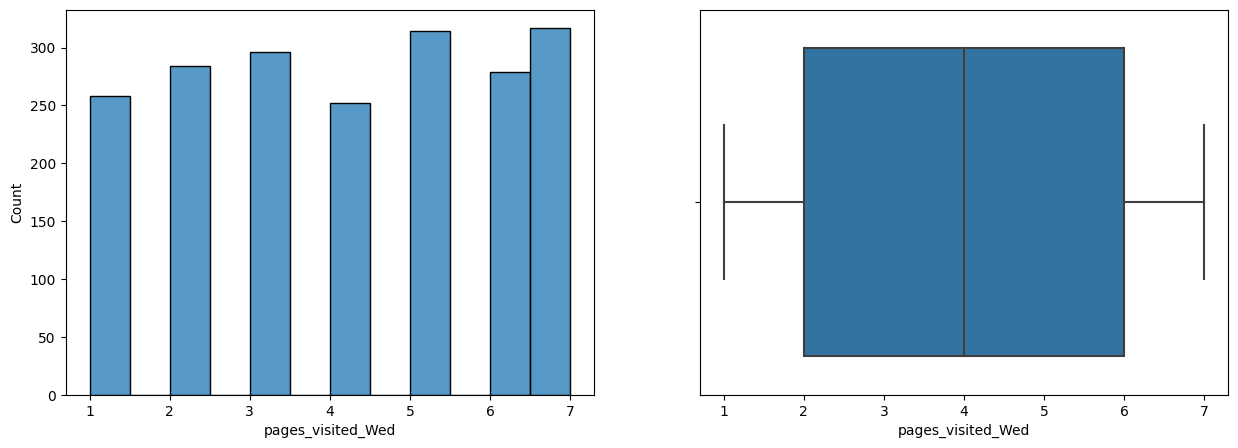

-0.04085392039165272
-1.2579255723955745


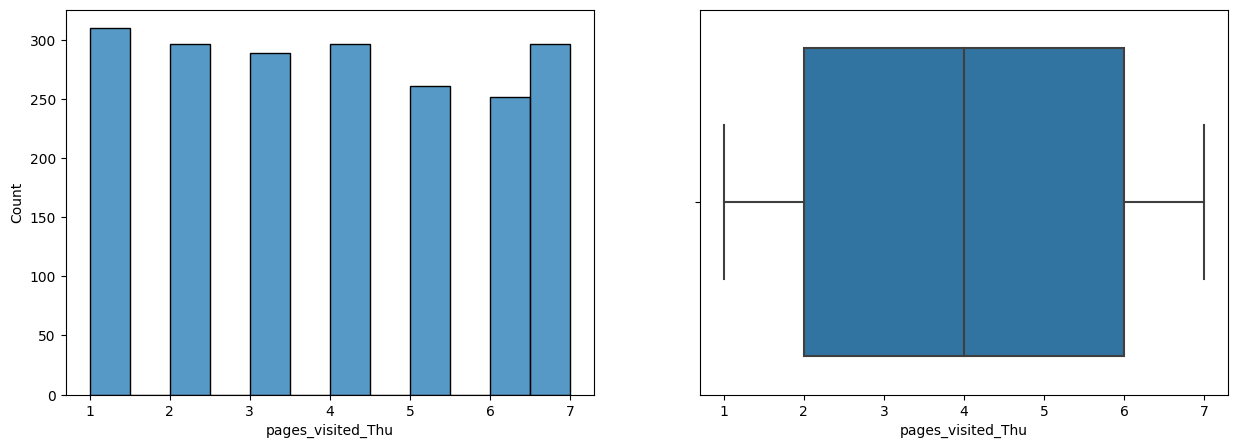

0.07143296575137245
-1.253809925247334


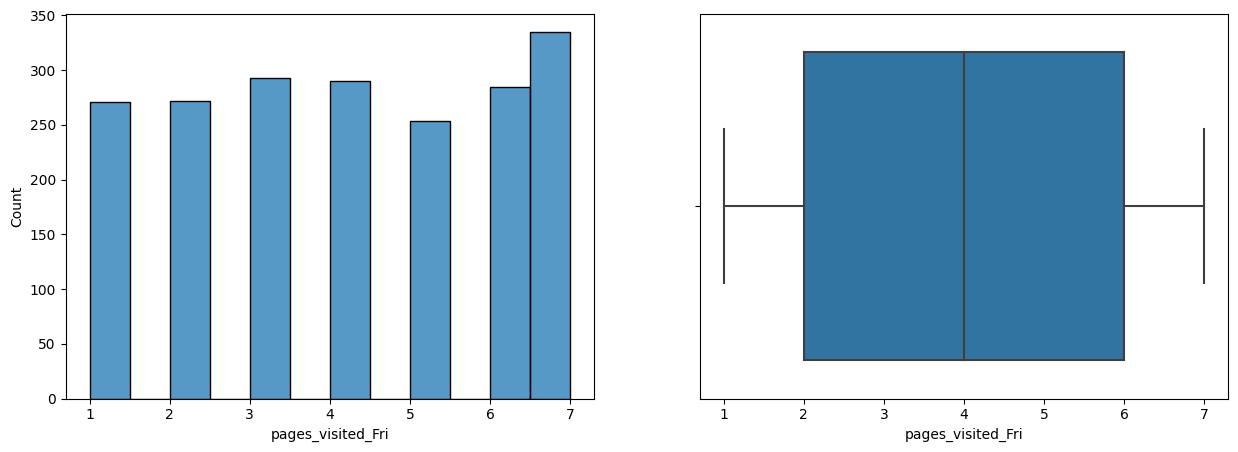

-0.024852162916737724
-1.2714425982291206


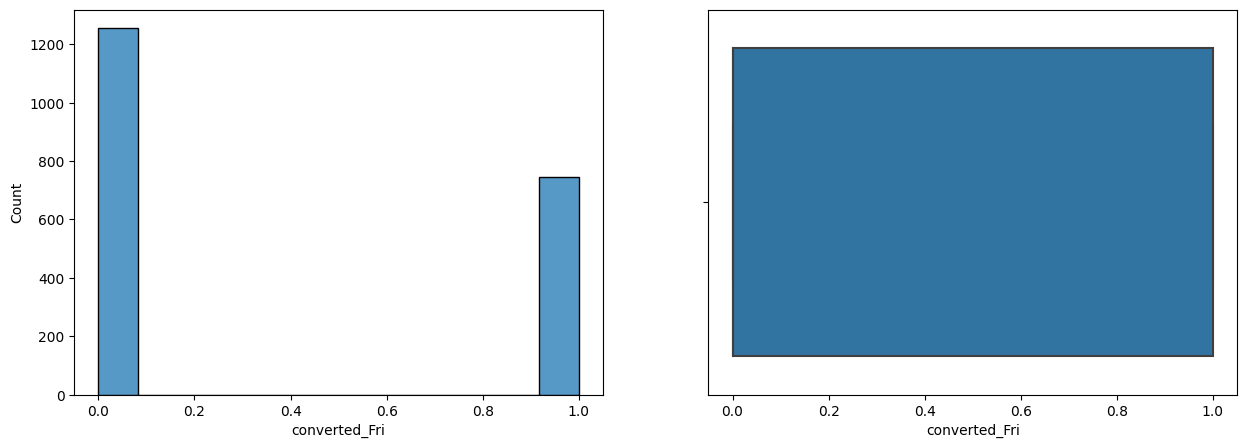

0.5296496303301287
-1.7194712690911582


In [40]:
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create histplots for each continuous variable vs. the output variable
   # Calculate skewness and kurtosis
    
for col in continuous_columns:
    skewness = scipy.stats.skew(df[col])
    kurtosis = scipy.stats.kurtosis(df[col], fisher=True)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    sns.histplot(x=col,data=df, ax=ax1)
    sns.boxplot(x=col,data=df, ax=ax2)
    plt.show()
    print(skewness) 
    print(kurtosis)

Product views Monday seems to be no outliers based on histgoram + boxplot also with platykurtic kurtosis and very low negative skew 
-0.04339723992227179
-1.2595334694359583
Product views Tuesday seems to be no outliers  based on histgoram + boxplot with platykurtic kurtosis and very low postive skew 
0.05239895534857225
-1.278349926686584
Product views Wednesday seems to be no outliers  based on histgoram + boxplot with mesokurtic kurtosis and postive skew 
0.7078649532941341
-0.35422487943281133
Product views Thursday seems to be no outliers  based on histgoram + boxplot with platykurtic kurtosis and very low positive skew 
0.18508333245295
-1.019154529926297
Product views Friday seems to be no outliers  based on histgoram + boxplot with platykurtic kurtosis and very low postive skew 
0.19578852072874067
-1.230292770208432
Average rating  Monday seems to be no outliers  based on histgoram + boxplot with platykurtic kurtosis and very low negative skew 
-0.036569401570234646
-1.2192260019428236
Average rating  Tuesday seems to be no outliers  based on histgoram + boxplot with platykurtic kurtosis and very low negative skew
-0.04306188757167769
-1.192970789047595

For time sake based on the above could be repeated however it seems like there are no outliers present 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   visitor_id         2000 non-null   int64   
 1   visitor_location   2000 non-null   category
 2   marketing_channel  2000 non-null   category
 3   gender             2000 non-null   category
 4   product_views_Mon  2000 non-null   int64   
 5   product_views_Tue  2000 non-null   int64   
 6   product_views_Wed  2000 non-null   int64   
 7   product_views_Thu  2000 non-null   int64   
 8   product_views_Fri  2000 non-null   int64   
 9   avg_rating_Mon     2000 non-null   float64 
 10  avg_rating_Tue     2000 non-null   float64 
 11  avg_rating_Wed     2000 non-null   float64 
 12  avg_rating_Thu     2000 non-null   float64 
 13  avg_rating_Fri     2000 non-null   float64 
 14  avg_price_Mon      2000 non-null   float64 
 15  avg_price_Tue      2000 non-null   float64 
 16  avg_pr

<Axes: xlabel='gender', ylabel='Count'>

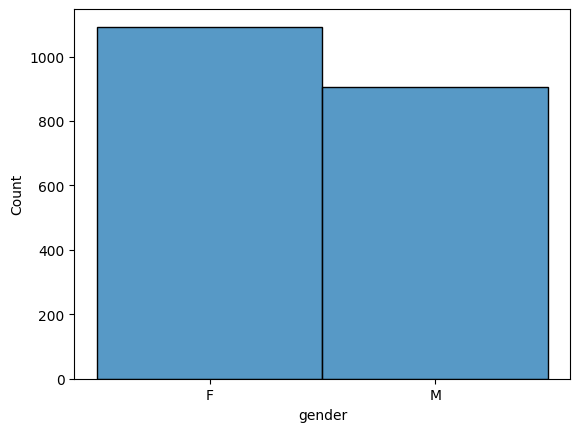

In [44]:
sns.histplot(df['gender'])

<Axes: xlabel='visitor_location', ylabel='Count'>

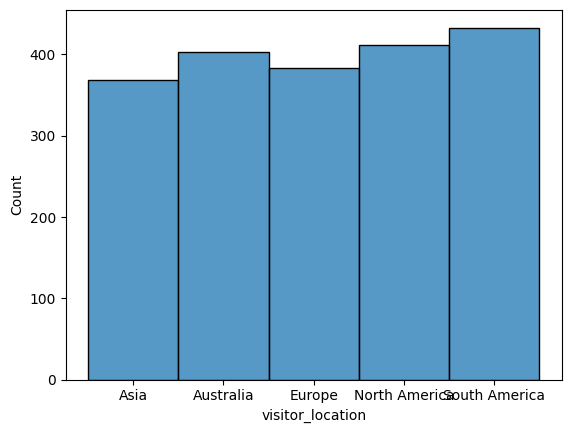

In [48]:
sns.histplot(df['visitor_location'])

<Axes: xlabel='marketing_channel', ylabel='Count'>

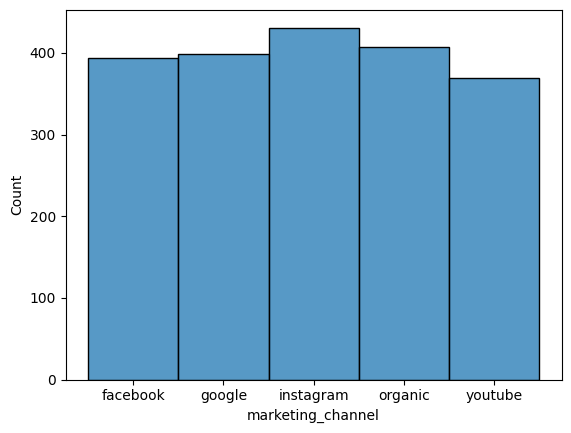

In [49]:
sns.histplot(df['marketing_channel'])

According to this the categorical variables seem to be all good so we can move on from the data cleaning step

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   visitor_id         2000 non-null   int64   
 1   visitor_location   2000 non-null   category
 2   marketing_channel  2000 non-null   category
 3   gender             2000 non-null   category
 4   product_views_Mon  2000 non-null   int64   
 5   product_views_Tue  2000 non-null   int64   
 6   product_views_Wed  2000 non-null   int64   
 7   product_views_Thu  2000 non-null   int64   
 8   product_views_Fri  2000 non-null   int64   
 9   avg_rating_Mon     2000 non-null   float64 
 10  avg_rating_Tue     2000 non-null   float64 
 11  avg_rating_Wed     2000 non-null   float64 
 12  avg_rating_Thu     2000 non-null   float64 
 13  avg_rating_Fri     2000 non-null   float64 
 14  avg_price_Mon      2000 non-null   float64 
 15  avg_price_Tue      2000 non-null   float64 
 16  avg_pr

#DATA EXPLORATION

Now that we have finished cleaning we can create an initial hypothesis my theory is that 
the marketing channel along with the pages_visited, average_price, and product_views would be the most important. I believe that these three factors would be most important based on the days. So Friday would be the most important wheras the days further away are less important. 

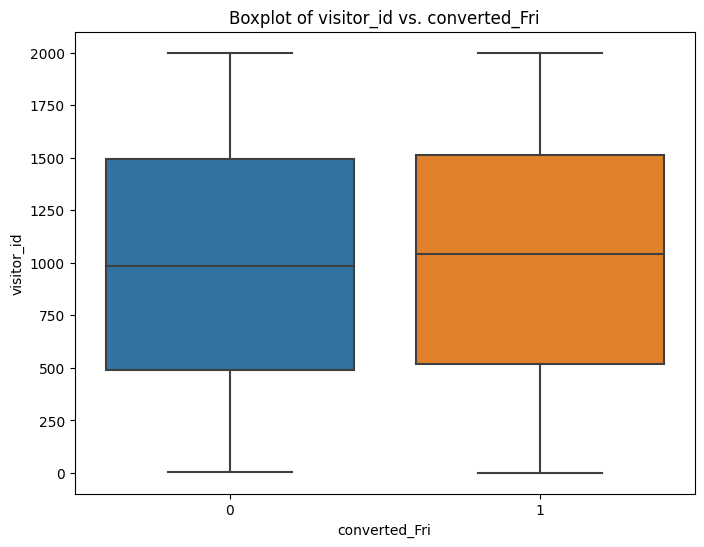

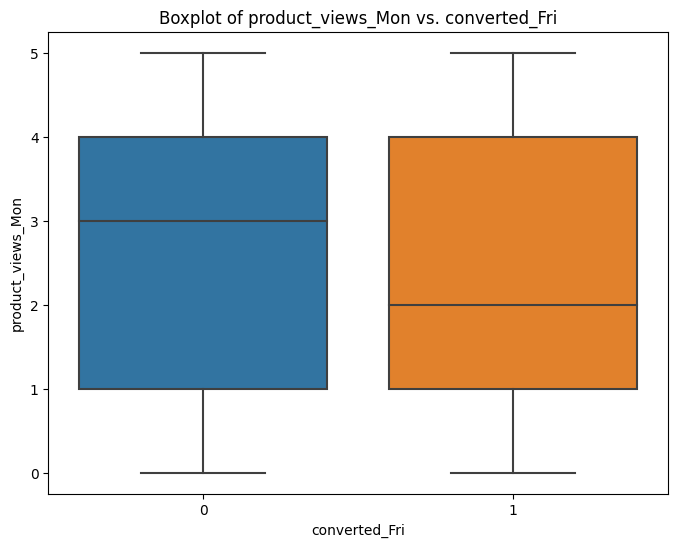

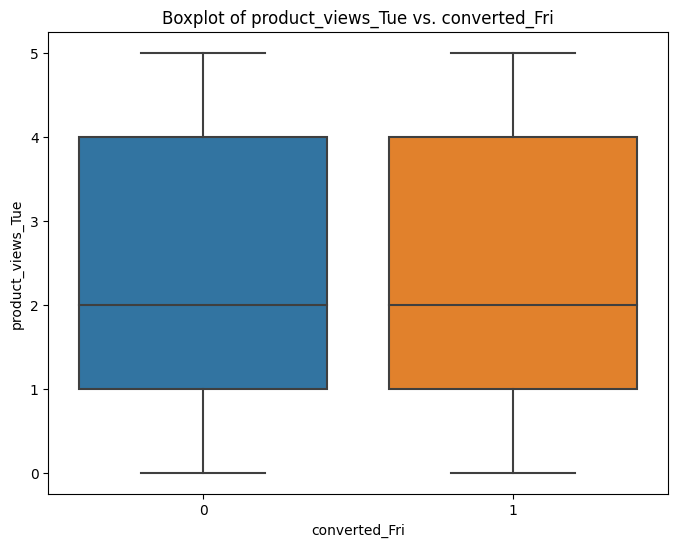

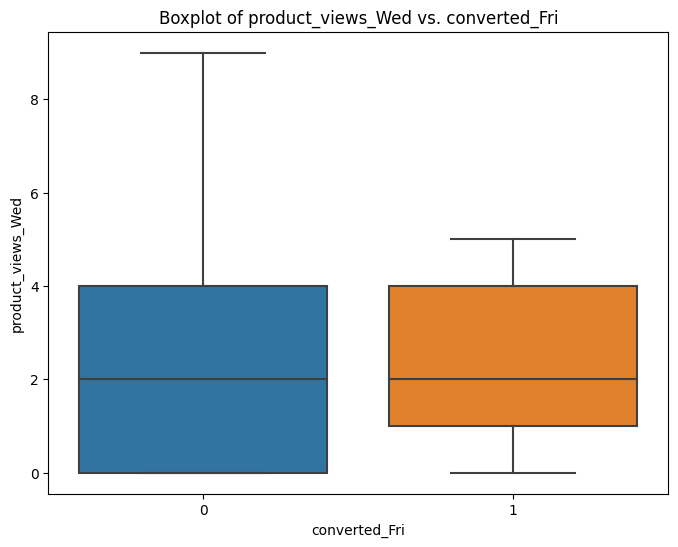

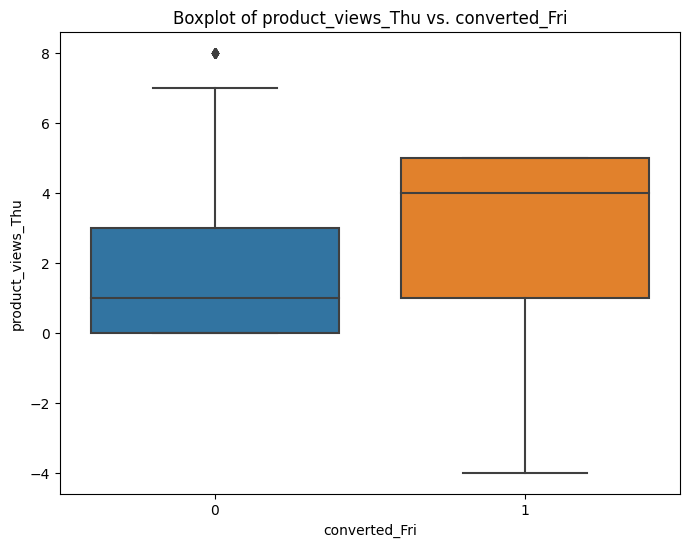

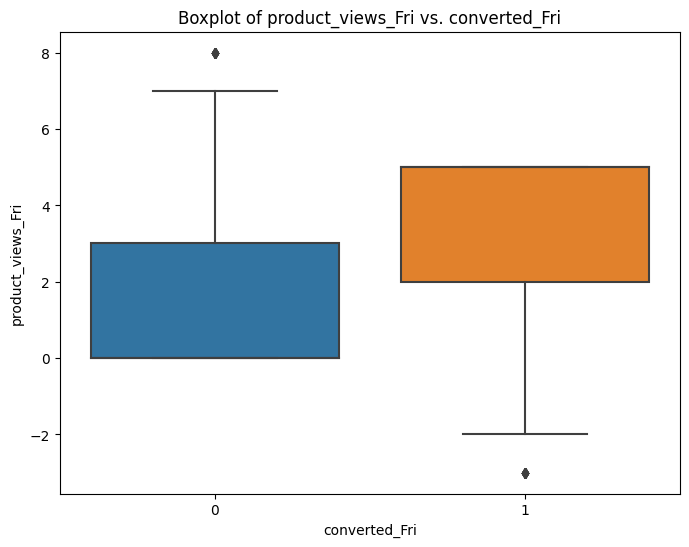

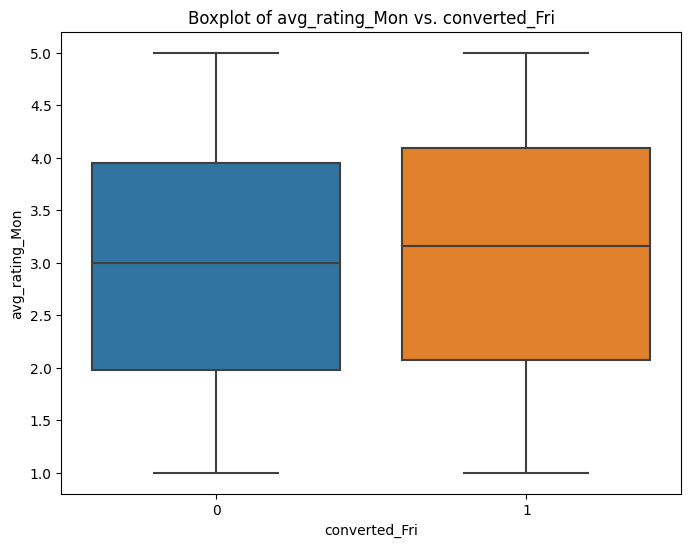

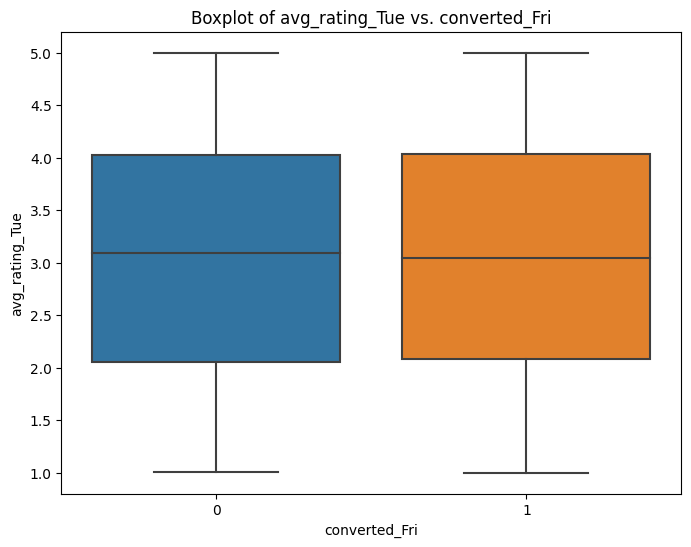

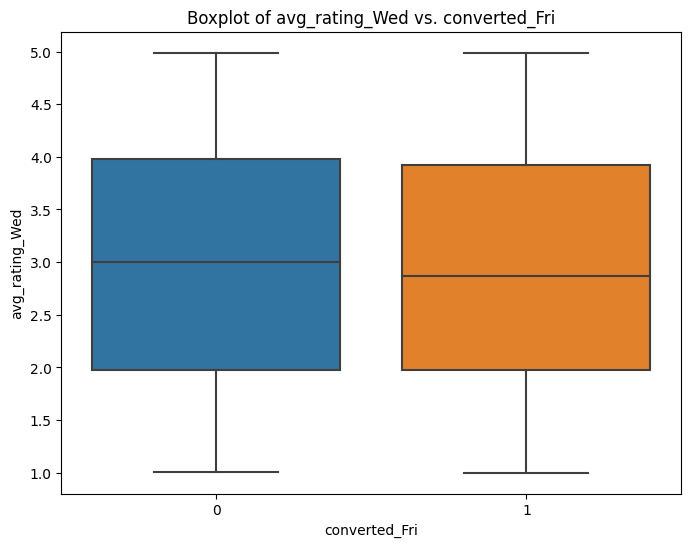

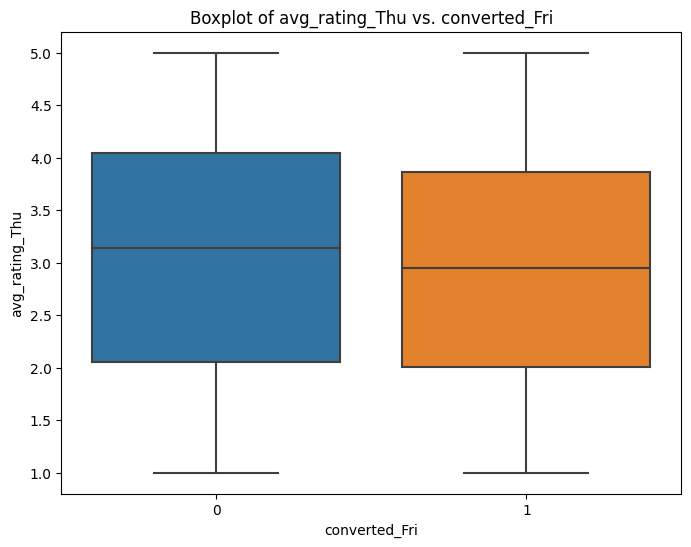

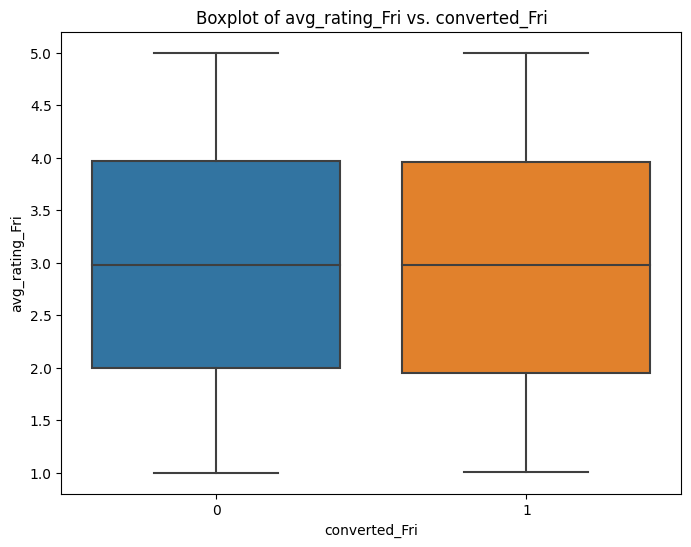

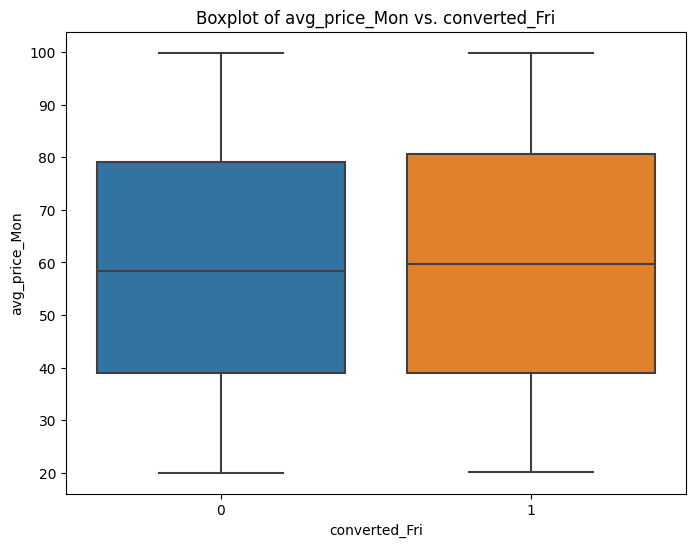

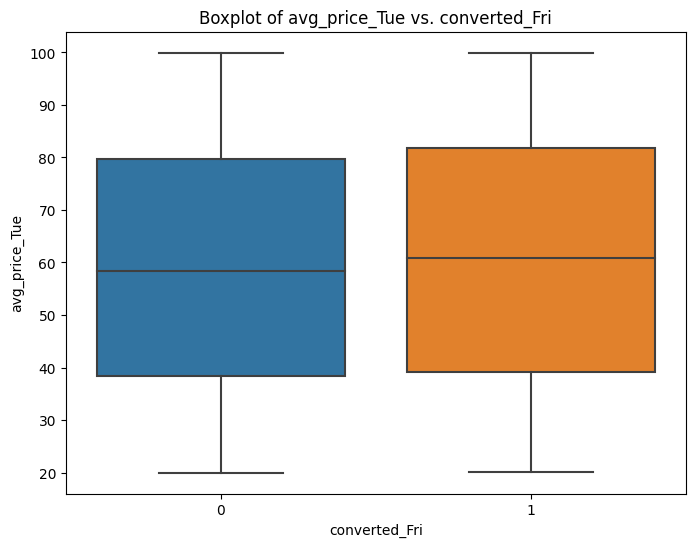

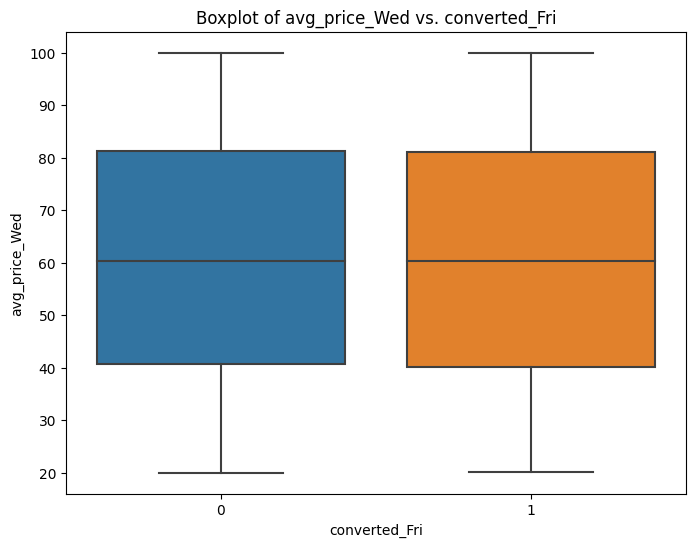

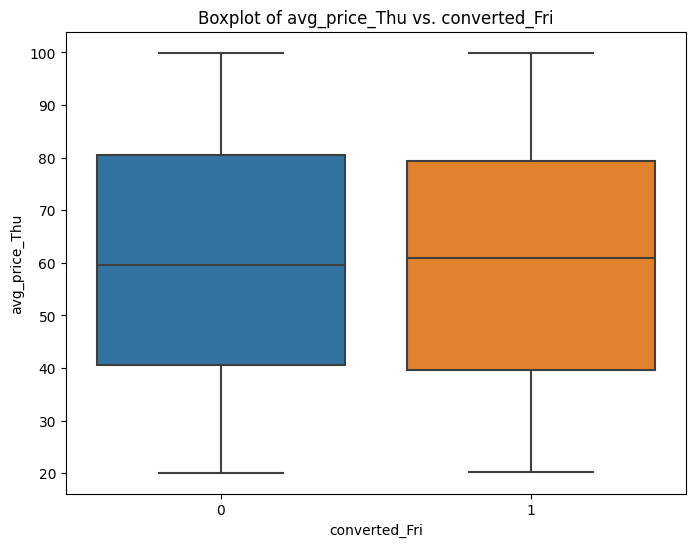

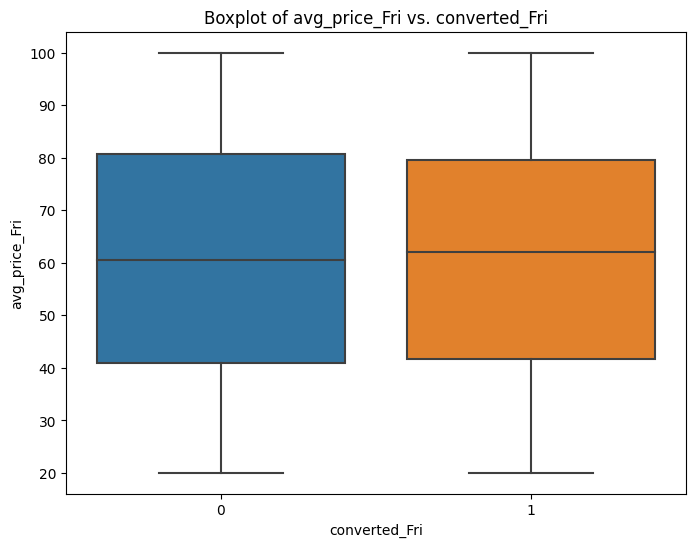

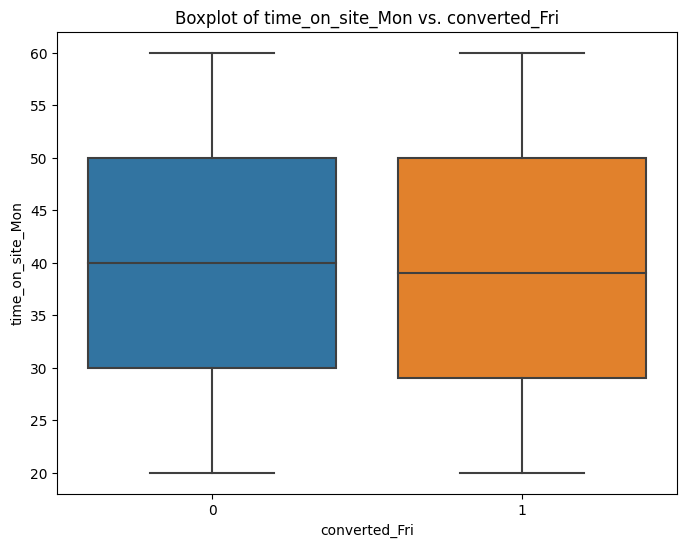

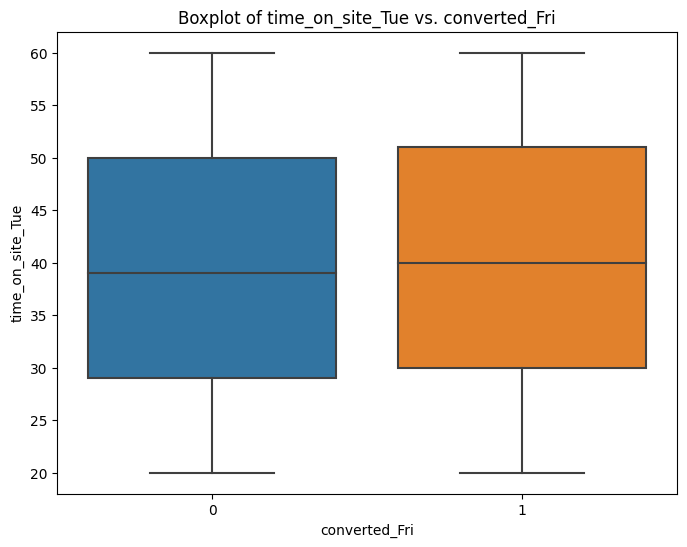

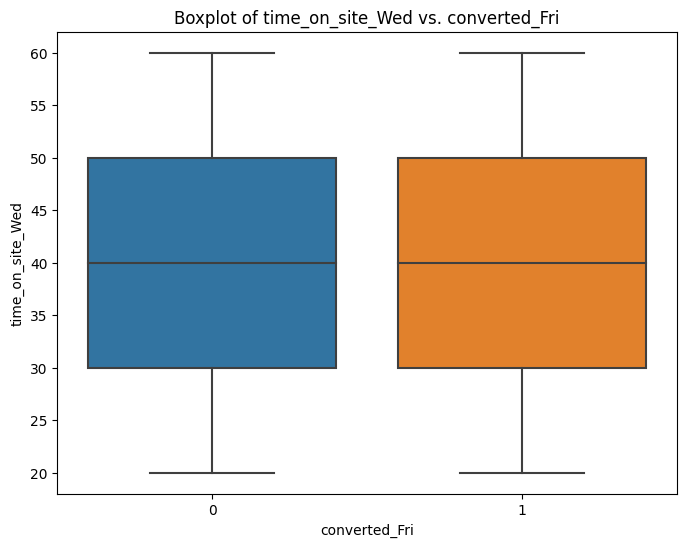

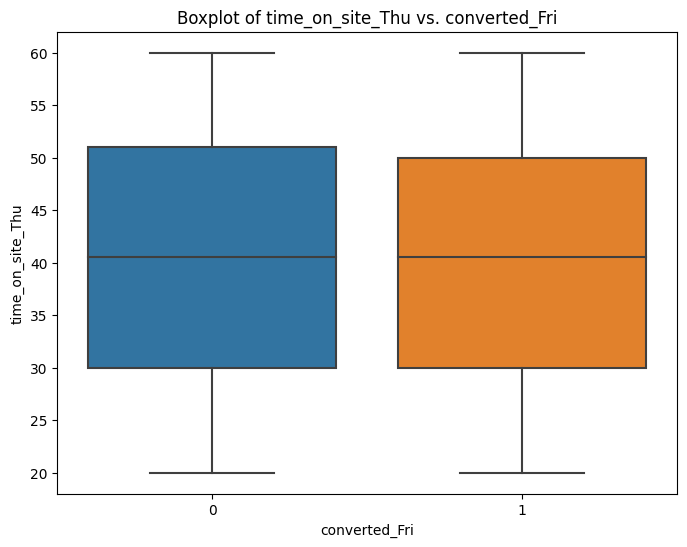

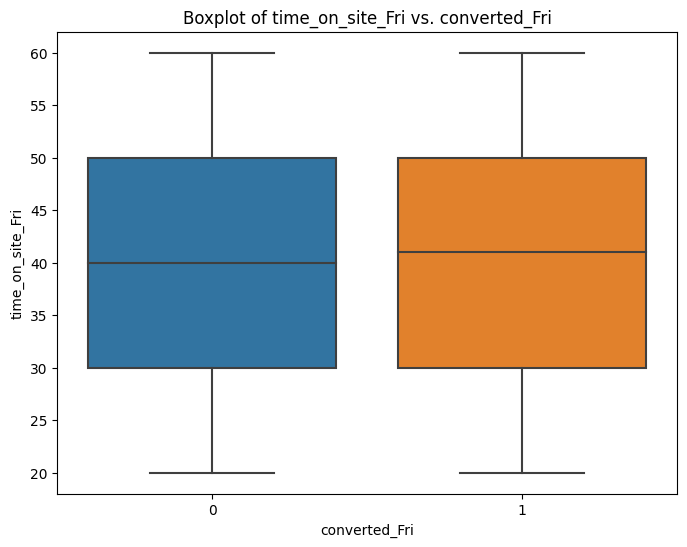

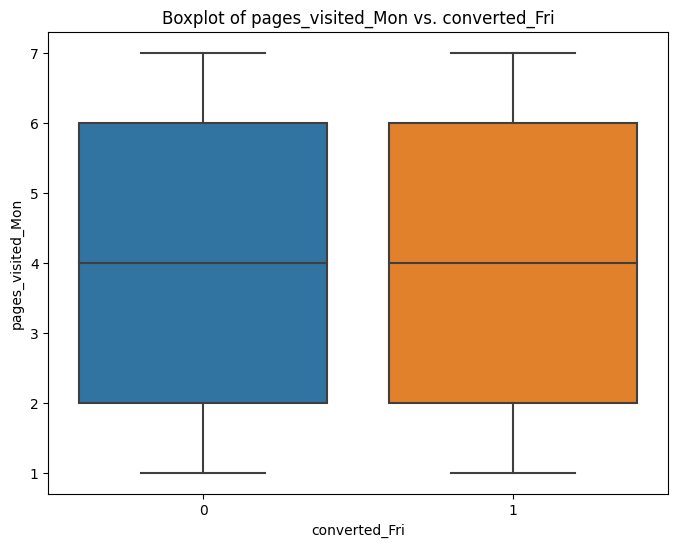

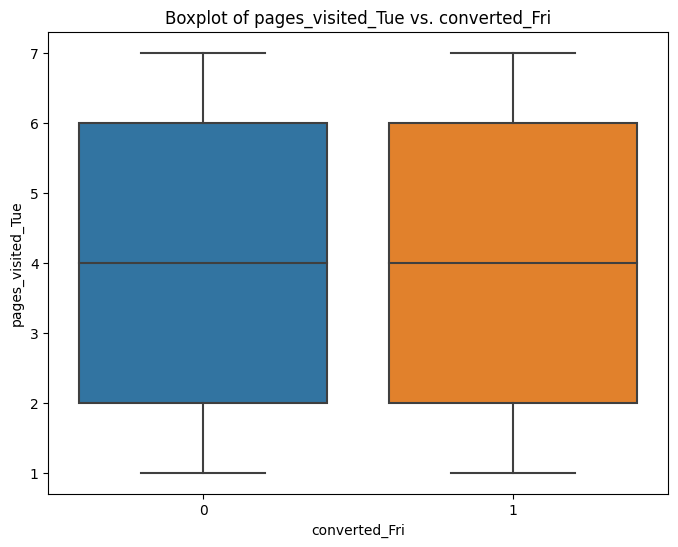

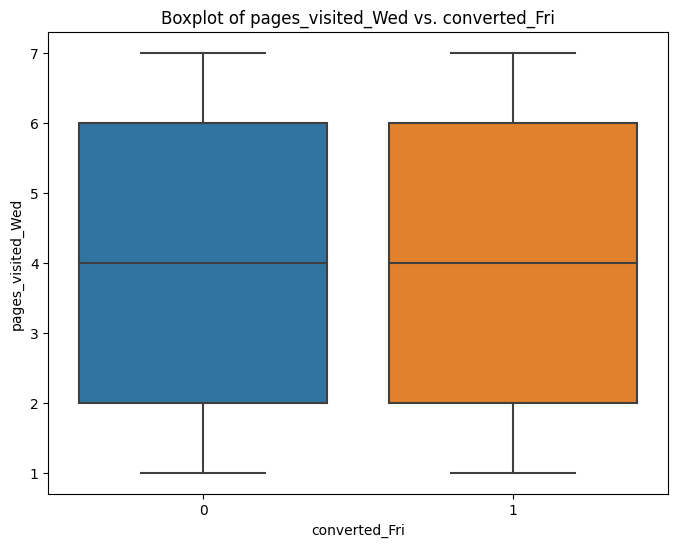

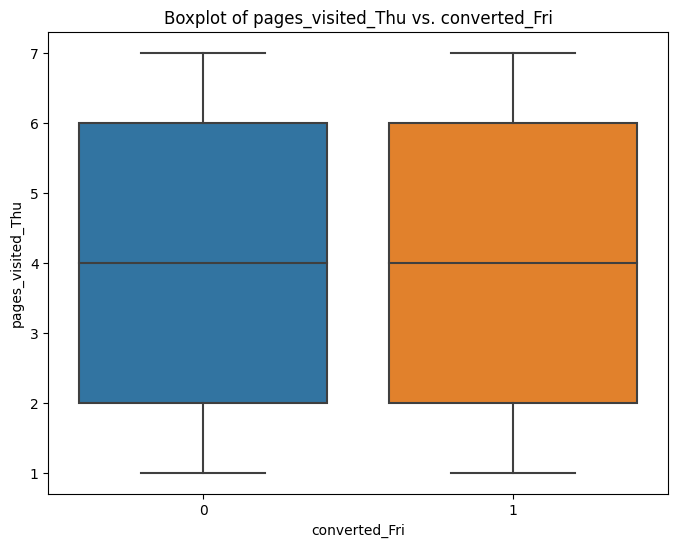

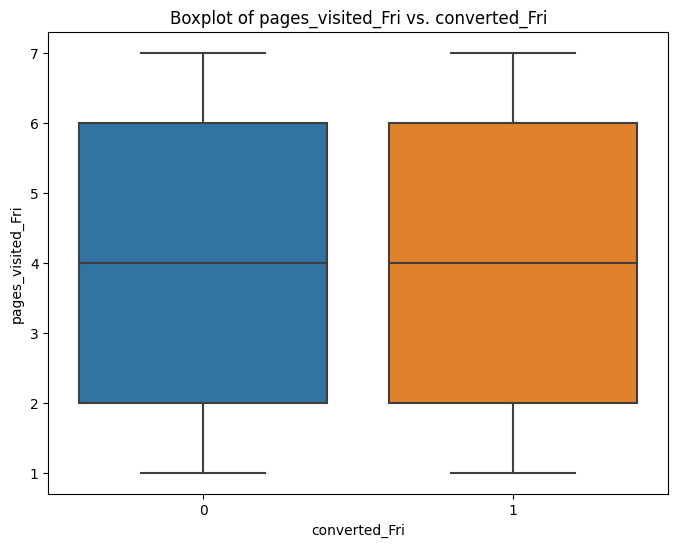

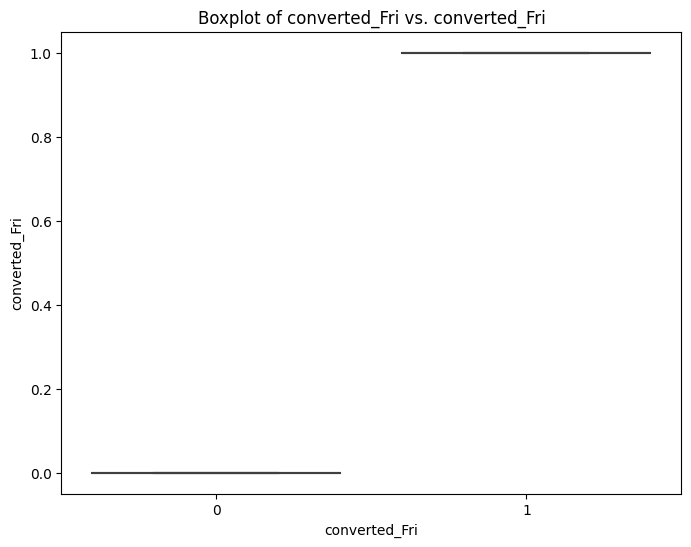

In [51]:
# Select columns with numeric data types (integers or floating-point numbers)
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Output variable (categorical)
output_variable = 'converted_Fri'

# Create boxplots for each continuous variable vs. the output variable
for col in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=output_variable, y=col, data=df)
    plt.title(f'Boxplot of {col} vs. {output_variable}')
    plt.show()

Okay so based on this we need to revise the hypothesis as variables that cause a change in the distribution of converted_Fri are important predictors as they are what help us differntiate them

Based on that product_views_Thu and product_views_Fri make the most sense from the original hypothesis
However average ratings Monday and Thursday seem to hold a more impact than the other days
It also seems like Average Price has a slight change as well for all the days
TIme On Site and Pages visited dont seem to have an effect

Now we need to go to categorical variablees

In [52]:
df['gender'].unique()

['M', 'F']
Categories (2, object): ['F', 'M']

In [56]:
df_gender= df.groupby(['converted_Fri', 'gender'])[['gender']].count().unstack()

# Rename the columns for clarity
df_gender.columns = ['M', 'F']

# Append a row to represent the sum of 'Personal Loan' values 0 and 1
df_gender.loc['Total 0-1', :] = df_gender.loc[0, :] + df_gender.loc[1, :]

# Calculate column totals
df_gender['Total'] = df_gender['M'] + df_gender['F'] 

# Calculate percentages
df_gender['Percentage M'] = df_gender['M'] / df_gender['Total']
df_gender['Percentage F'] = df_gender['F'] / df_gender['Total']

df_gender

,M,F,Total,Percentage M,Percentage F
converted_Fri,,,,,
0,602.0,654.0,1256.0,0.479299,0.520701
1,491.0,253.0,744.0,0.659946,0.340054
Total 0-1,1093.0,907.0,2000.0,0.546500,0.453500


This shows that overall Males are more likely to be converted than females as 491 males said yes versus 253 females

In [57]:
df['visitor_location'].unique()

['North America', 'South America', 'Australia', 'Asia', 'Europe']
Categories (5, object): ['Asia', 'Australia', 'Europe', 'North America', 'South America']

In [59]:
df_location= df.groupby(['converted_Fri', 'visitor_location'])[['visitor_location']].count().unstack()

# Rename the columns for clarity
df_location.columns = ['North America', 'South America', 'Australia', 'Asia', 'Europe']

# Append a row to represent the sum of 'Personal Loan' values 0 and 1
df_location.loc['Total 0-1', :] = df_location.loc[0, :] + df_location.loc[1, :]

# Calculate column totals
df_location['Total'] = df_location['North America'] + df_location['South America'] + df_location['Australia'] + df_location['Asia'] + df_location['Europe'] 

# Calculate percentages
df_location['Percentage North America'] = df_location['North America'] / df_location['Total']
df_location['Percentage South America'] = df_location['South America'] / df_location['Total']
df_location['Percentage Australia'] = df_location['Australia']  / df_location['Total']
df_location['Percentage Asia'] = df_location['Asia']  / df_location['Total']
df_location['Percentage Europe'] = df_location['Europe']  / df_location['Total']
df_location


,North America,South America,Australia,Asia,Europe,Total,Percentage North America,Percentage South America,Percentage Australia,Percentage Asia,Percentage Europe
converted_Fri,,,,,,,,,,,
0,231.0,268.0,235.0,267.0,255.0,1256.0,0.183917,0.213376,0.187102,0.212580,0.203025
1,138.0,135.0,148.0,145.0,178.0,744.0,0.185484,0.181452,0.198925,0.194892,0.239247
Total 0-1,369.0,403.0,383.0,412.0,433.0,2000.0,0.184500,0.201500,0.191500,0.206000,0.216500


This shows that there is no standout variation from the visitors location

In [60]:
df['marketing_channel'].unique()

['youtube', 'organic', 'instagram', 'facebook', 'google']
Categories (5, object): ['facebook', 'google', 'instagram', 'organic', 'youtube']

In [62]:
df_channel= df.groupby(['converted_Fri', 'marketing_channel'])[['marketing_channel']].count().unstack()

# Rename the columns for clarity
df_channel.columns = ['youtube', 'organic', 'instagram', 'facebook', 'google']

# Append a row to represent the sum of 'Personal Loan' values 0 and 1
df_channel.loc['Total 0-1', :] = df_channel.loc[0, :] + df_channel.loc[1, :]

# Calculate column totals
df_channel['Total'] = df_channel['youtube'] + df_channel['organic'] + df_channel['instagram'] + df_channel['facebook'] + df_channel['google'] 

# Calculate percentages
df_channel['Percentage youtube'] = df_channel['youtube'] / df_channel['Total']
df_channel['Percentage organic'] = df_channel['organic'] / df_channel['Total']
df_channel['Percentage facebook'] = df_channel['facebook']  / df_channel['Total']
df_channel['Percentage instagram'] = df_channel['instagram']  / df_channel['Total']
df_channel['Percentage google'] = df_channel['google']  / df_channel['Total']
df_channel

,youtube,organic,instagram,facebook,google,Total,Percentage youtube,Percentage organic,Percentage facebook,Percentage instagram,Percentage google
converted_Fri,,,,,,,,,,,
0,238.0,234.0,257.0,311.0,216.0,1256.0,0.189490,0.186306,0.247611,0.204618,0.171975
1,156.0,165.0,174.0,96.0,153.0,744.0,0.209677,0.221774,0.129032,0.233871,0.205645
Total 0-1,394.0,399.0,431.0,407.0,369.0,2000.0,0.197000,0.199500,0.203500,0.215500,0.184500


As I thought certain channels perform with Meta marketing being both the winner and loser with instgram at 23% converted and facebook at 12% converted

Based on that product_views_Thu and product_views_Fri make the most sense from the original hypothesis
However average ratings Monday and Thursday seem to hold a more impact than the other days
It also seems like Average Price has a slight change as well for all the days
TIme On Site and Pages visited dont seem to have an effect
Based on the above we add gender and marketing_channel to our hypothesis

#Feature engineering

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   visitor_id         2000 non-null   int64   
 1   visitor_location   2000 non-null   category
 2   marketing_channel  2000 non-null   category
 3   gender             2000 non-null   category
 4   product_views_Mon  2000 non-null   int64   
 5   product_views_Tue  2000 non-null   int64   
 6   product_views_Wed  2000 non-null   int64   
 7   product_views_Thu  2000 non-null   int64   
 8   product_views_Fri  2000 non-null   int64   
 9   avg_rating_Mon     2000 non-null   float64 
 10  avg_rating_Tue     2000 non-null   float64 
 11  avg_rating_Wed     2000 non-null   float64 
 12  avg_rating_Thu     2000 non-null   float64 
 13  avg_rating_Fri     2000 non-null   float64 
 14  avg_price_Mon      2000 non-null   float64 
 15  avg_price_Tue      2000 non-null   float64 
 16  avg_pr

In [64]:
df['avg_weekly_rating'] = ( df['avg_rating_Tue'] +  df['avg_rating_Mon']  +  df['avg_rating_Thu']  +  df['avg_rating_Wed']  +  df['avg_rating_Fri'])/5

In [65]:
df['avg_weekly_price'] = ( df['avg_price_Tue'] +  df['avg_price_Mon']  +  df['avg_price_Thu']  +  df['avg_price_Wed']  +  df['avg_price_Fri'])/5

Create features to get the weekly average for each user visitor

In [67]:
df['total_time_site'] = ( df['time_on_site_Fri'] +  df['time_on_site_Mon']  +  df['time_on_site_Thu']  +  df['time_on_site_Wed']  +  df['time_on_site_Tue'])

In [71]:
df['total_product_views'] = ( df['product_views_Fri'] +  df['product_views_Mon']  +  df['product_views_Thu']  +  df['product_views_Wed']  +  df['product_views_Tue'])

In [72]:
df['total_pages_visited'] = ( df['pages_visited_Fri'] +  df['pages_visited_Mon']  +  df['pages_visited_Thu']  +  df['pages_visited_Wed']  +  df['pages_visited_Tue'])

Create features to get the weekly total for each user visitor

In [76]:
def organic(x):
    if x == 'organic':
        return 1
    else:
        return 0

In [77]:
df['is_organic'] = df['marketing_channel'].apply(organic)

Since organic marketing is nice to have we create a separate binary variable to see if marketing was organic to specifically investigate how organic marketing affections predictions